# Pandas

[Pandas](https://pandas.pydata.org/) is a popular Python library for data manipulation and analysis. It offers a wide range of data structures and functions that are essential for working with structured data. One of the common aliases for importing Pandas is `pd`. With Pandas, you can efficiently manage, clean, transform, and analyze data, making it a valuable tool for data scientists, analysts, and engineers.

# Matplotlib.pyplot

[Matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) is a powerful Python library used for creating 2D graphics and visualizations. It can be employed in various Python environments, including scripts, interactive shells, web applications, and graphical user interface toolkits. The common alias for importing Matplotlib's `pyplot` module is `plt`. Matplotlib is widely used for generating charts, plots, and graphs, making it an essential tool for data visualization and presentation.

# NumPy

[NumPy](https://numpy.org/) is a fundamental library for the Python programming language. It enhances Python's capabilities by providing support for large, multi-dimensional arrays and matrices. NumPy also includes an extensive collection of high-level mathematical functions designed to operate efficiently on these arrays. A common alias for importing NumPy is `np`. This library is crucial for numerical computing, scientific computing, and data analysis tasks, as it allows for efficient handling of numerical data and mathematical operations in Python.


In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


The code below load the data from the CSV file `source file` using Pandas and displays the first few rows of the DataFrame using `df.head()`.



In [352]:
file_path = "data.csv"
df = pd.read_csv(file_path)


## Description of the dataset

- COUNTRY: Name of the country
- CODE_TIME: A code that represents the month and year (e.g., JAN2010 for January 2010)
- TIME: The month and year in a more human-readable format (e.g., January 2010)
- YEAR: The year of the data point
- MONTH: The month of the data point as a number (1-12)
- MONTH_NAME: The month of the data point as a string (e.g., January)
- PRODUCT: The type of energy product (e.g., Hydro, Wind, Solar)
- VALUE: The amount of electricity generated in gigawatt-hours (GWh)
- DISPLAY_ORDER: The order in which the products should be displayed
- yearToDate: The amount of electricity generated for the current year up to the current month in GWh
- previousYearToDate: The amount of electricity generated for the previous year up to the current month in GWh
- share: The share of the product in the total electricity generation for the country in decimal format



In [353]:
print("Number of rows:", df.shape[0])
print("Number of Features:", df.shape[1])
print(f"The size of df is {df.shape[0]} rows x {df.shape[1]} features.")


Number of rows: 181915
Number of Features: 12
The size of df is 181915 rows x 12 features.


# Dataset Information Overview

o obtain an overview of the dataset's structure and the count of non-null values for each column, the code `df.dtypes()` was executed.

We have 12 columns in the dataset, and each column has a different data type.

The `object` data type represents strings, while `int64` and `float64` represent numeric values. The `object` data type is also used for columns that contain values of different data types.

For example, the `CODE_TIME` column contains both strings and integers.

The `df.dtypes` attribute displays the data type for each column. The output shows that the `COUNTRY`, `CODE_TIME`, `TIME`, `MONTH_NAME`, and `PRODUCT` columns are of the `object` data type, while the remaining columns are of the `int64` data type.

In [354]:
print(df.dtypes)

COUNTRY                object
CODE_TIME              object
TIME                   object
YEAR                    int64
MONTH                   int64
MONTH_NAME             object
PRODUCT                object
VALUE                 float64
DISPLAY_ORDER           int64
yearToDate            float64
previousYearToDate    float64
share                 float64
dtype: object


# Exploring the data

In [355]:
df['COUNTRY'].unique()


array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'IEA Total', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'OECD Americas',
       'OECD Asia Oceania', 'OECD Europe', 'OECD Total', 'Poland',
       'Portugal', 'Republic of Turkiye', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States', 'Colombia', 'Argentina', 'Brazil', 'Bulgaria',
       'Croatia', 'Cyprus', 'India', 'Malta', 'North Macedonia',
       'Romania', 'Serbia', 'Costa Rica'], dtype=object)

In [356]:
df['PRODUCT'].unique()

array(['Hydro', 'Wind', 'Solar', 'Geothermal', 'Total combustible fuels',
       'Coal', 'Oil', 'Natural gas', 'Combustible renewables',
       'Net electricity production', 'Electricity supplied',
       'Used for pumped storage', 'Distribution losses',
       'Final consumption', 'Renewables', 'Non-renewables', 'Others',
       'Other renewables aggregated', 'Low carbon', 'Fossil fuels',
       'Other combustible non-renewables', 'Not specified',
       'Total imports', 'Total exports', 'Electricity trade', 'Nuclear',
       'Other renewables'], dtype=object)

We are interested in the total electricity generation for each country. The `VALUE` column contains the amount of electricity generated in gigawatt-hours (GWh). We can use the `df.groupby()` method to calculate the total electricity generation for each country.

In [357]:
extractCountryWithTimelineAndProduct = df[['COUNTRY','YEAR','MONTH', 'VALUE','PRODUCT']]


In [358]:
extractCountryWithTimelineAndProduct.head()

,COUNTRY,YEAR,MONTH,VALUE,PRODUCT
0,Australia,2010,1,990.728,Hydro
1,Australia,2010,1,409.469,Wind
2,Australia,2010,1,49.216,Solar
3,Australia,2010,1,0.083,Geothermal
4,Australia,2010,1,19289.730,Total combustible fuels


The Top 5 countries with the highest electricity generation

In [359]:
MostCountryGenerationElectricity = extractCountryWithTimelineAndProduct[['COUNTRY' ,'VALUE']].groupby(['COUNTRY']).sum()
MostCountryGenerationElectricity.reset_index(inplace=True)
MostCountryGenerationElectricity.nlargest(5, 'VALUE')


,COUNTRY,VALUE
39,OECD Total,9.242596e+08
20,IEA Total,9.096110e+08
36,OECD Americas,4.527393e+08
51,United States,3.624349e+08
38,OECD Europe,3.056325e+08


In [360]:
TopCountry = MostCountryGenerationElectricity.nlargest(5, 'VALUE')['COUNTRY'].replace(' ', '')
SumOfGenerationElectricityPreSource = extractCountryWithTimelineAndProduct.groupby(['COUNTRY','PRODUCT']).sum()
SumOfGenerationElectricityPreSource.reset_index(inplace=True)


For each country of Top 5, we visually what type of energy source is used the most  



C:\Users\bilker\AppData\Local\Temp\ipykernel_17212\2962821571.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(products))


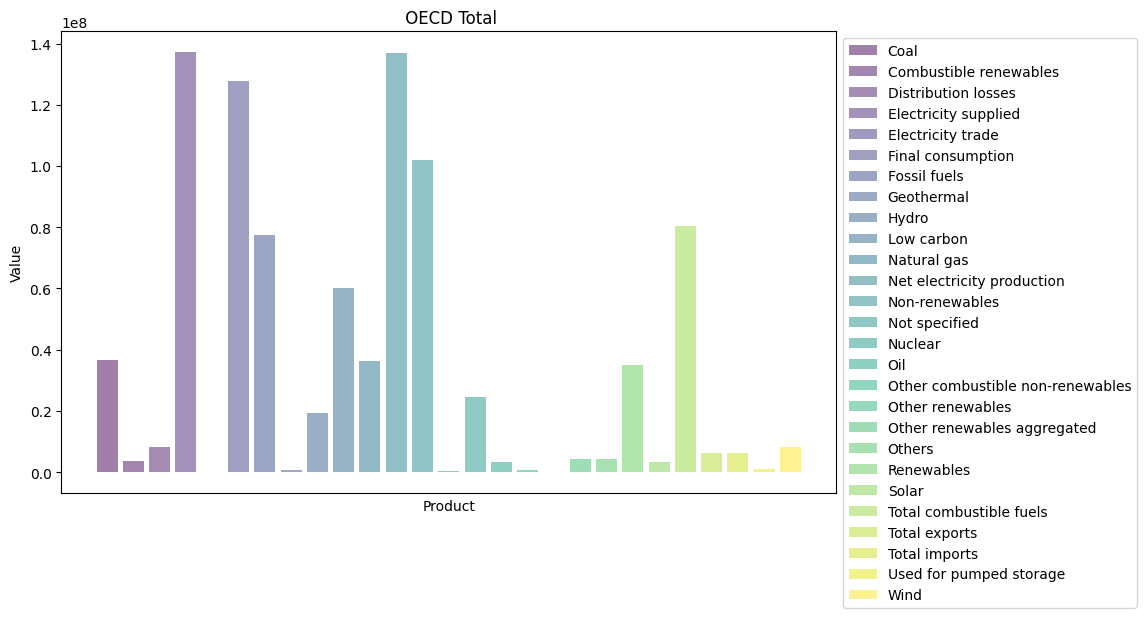

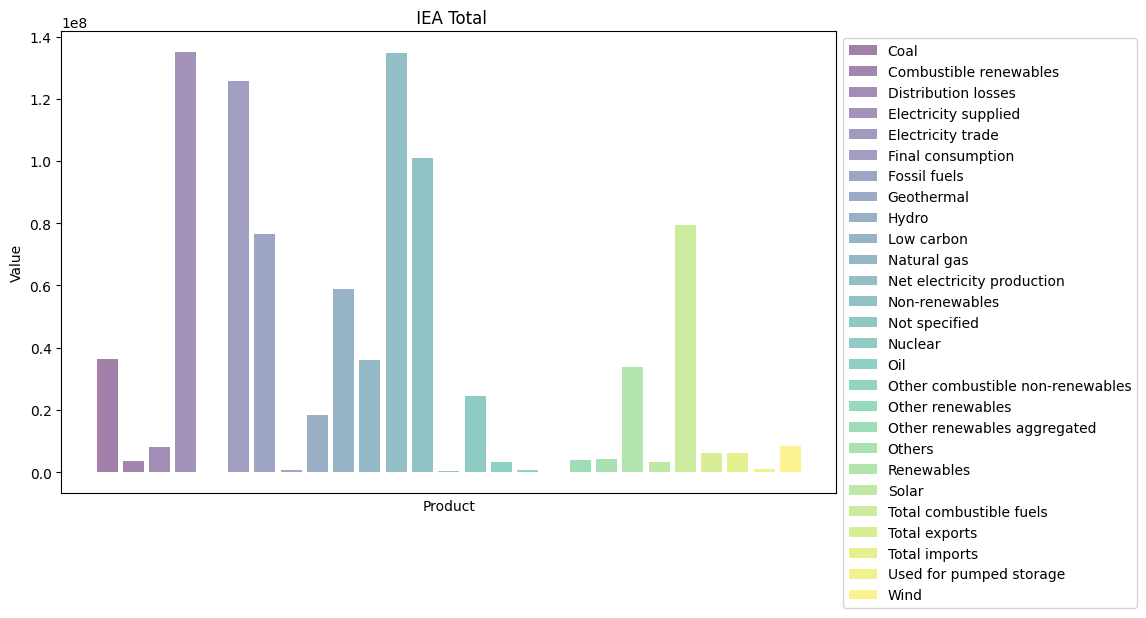

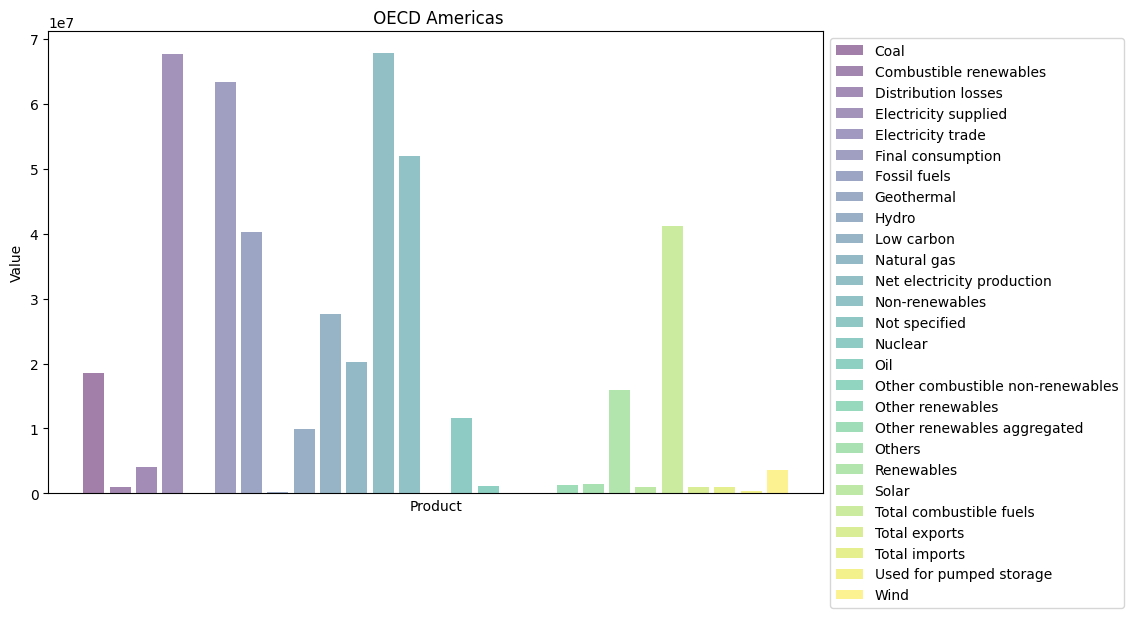

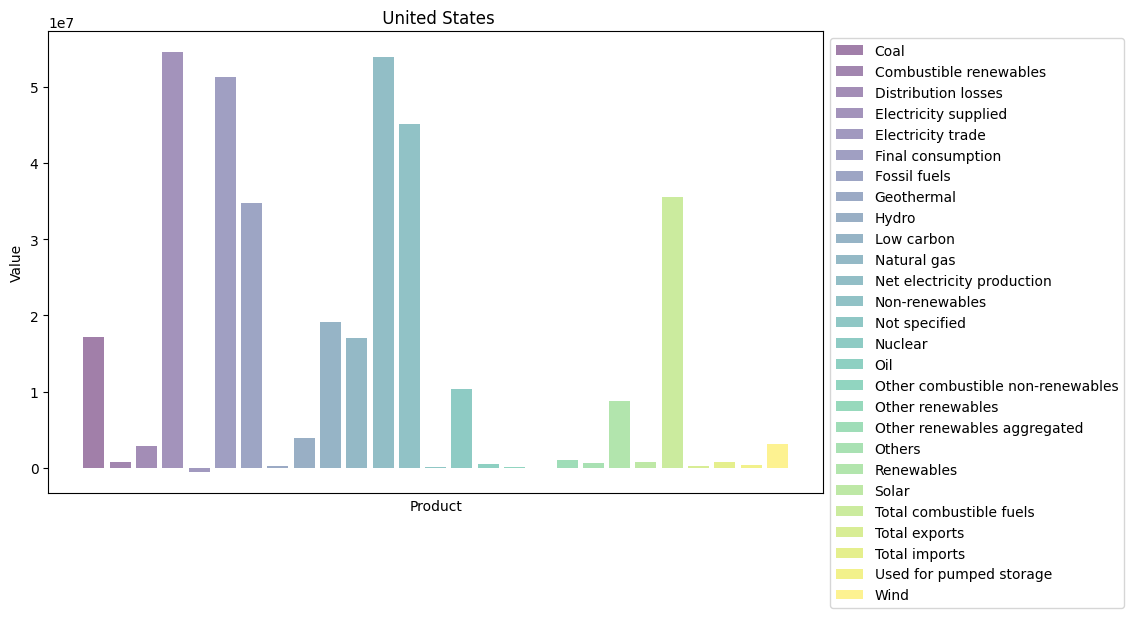

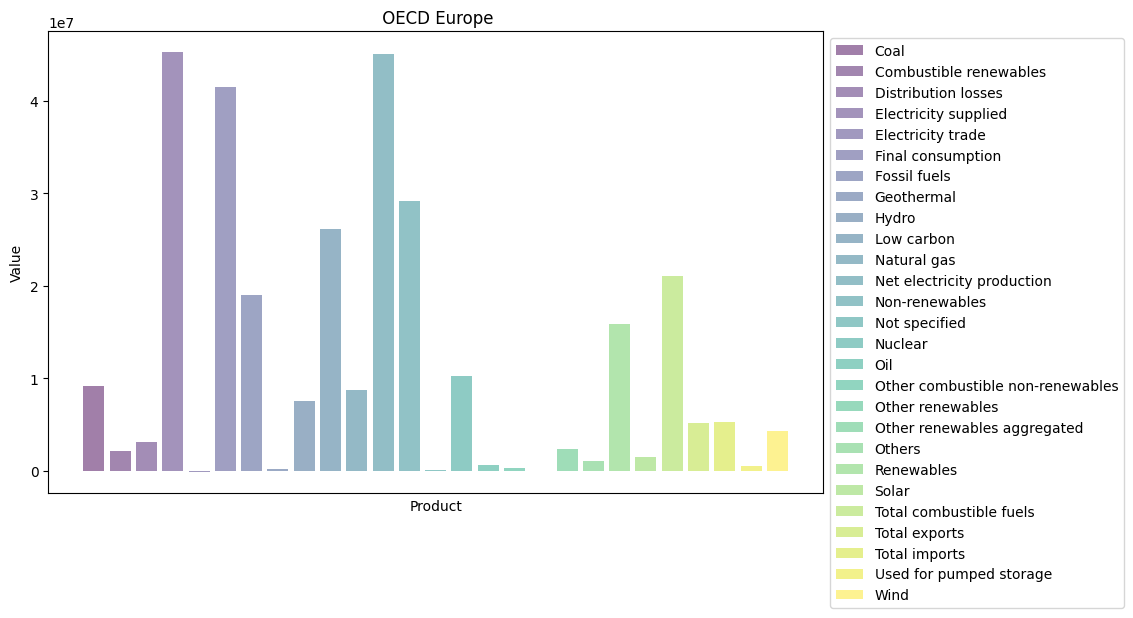

In [361]:
products = SumOfGenerationElectricityPreSource['PRODUCT'].unique()
colormap = plt.cm.get_cmap('viridis', len(products))
for i in TopCountry:
    subset = SumOfGenerationElectricityPreSource[SumOfGenerationElectricityPreSource['COUNTRY'] == i]
    plt.figure(figsize=(10, 6))
    for j, product in enumerate(products):
        product_subset = subset[subset['PRODUCT'] == product]
        color = colormap(j / len(products))
        plt.bar(product_subset['PRODUCT'], product_subset['VALUE'], label=product, color=color, alpha=0.5)

    plt.title(f' {i}')
    plt.xlabel('Product')
    plt.ylabel('Value')
    plt.xticks([])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

### Select one of the top 5 countries

C:\Users\bilker\AppData\Local\Temp\ipykernel_17212\3392023717.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(products))


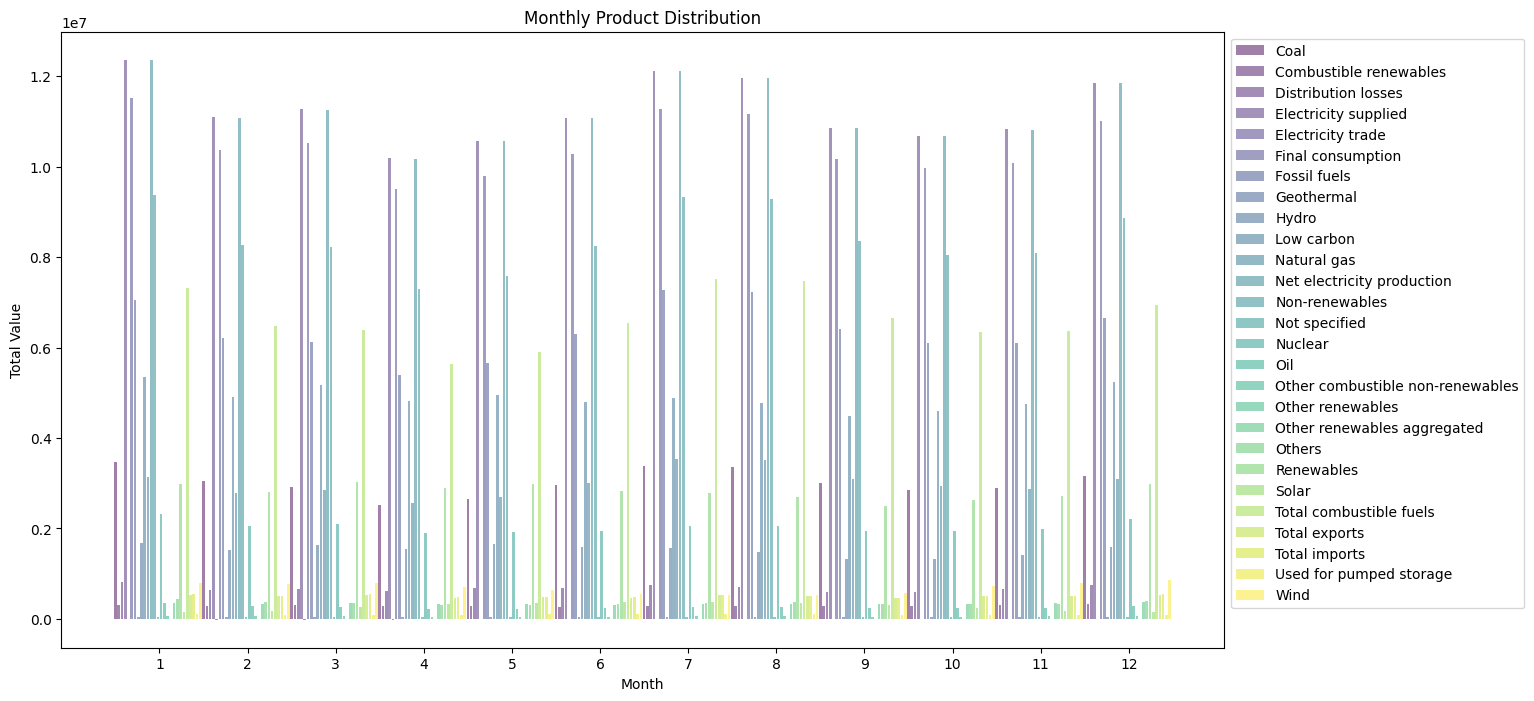

In [362]:
GenerationElectricityPreMonth = extractCountryWithTimelineAndProduct.groupby(['COUNTRY','PRODUCT','MONTH']).sum()
GenerationElectricityPreMonth.reset_index(inplace=True)
GenerationElectricityPreMonth.head()

OneCountry = GenerationElectricityPreMonth[GenerationElectricityPreMonth['COUNTRY'] == 'IEA Total'].groupby(['PRODUCT','MONTH']).sum()
OneCountry.reset_index(inplace=True)
OneCountry.head()
months = OneCountry['MONTH'].unique()
products = OneCountry['PRODUCT'].unique()
colormap = plt.cm.get_cmap('viridis', len(products))

plt.figure(figsize=(15, 8))

for i, month in enumerate(months):
    month_subset = OneCountry[OneCountry['MONTH'] == month]
    for j, product in enumerate(products):
        product_subset = month_subset[month_subset['PRODUCT'] == product]
        color = colormap(j / len(products))
        plt.bar(i * len(products) + j, product_subset['VALUE'].sum(), color=color, alpha=0.5)

plt.title('Monthly Product Distribution')
plt.xlabel('Month')
plt.ylabel('Total Value')
plt.xticks(np.arange(len(months)) * len(products) + len(products) / 2, months)
plt.legend(products, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Clean the data

In [363]:
# find null values
df.isnull().sum()


COUNTRY                   0
CODE_TIME                 0
TIME                      0
YEAR                      0
MONTH                     0
MONTH_NAME                0
PRODUCT                   0
VALUE                     0
DISPLAY_ORDER             0
yearToDate                0
previousYearToDate    17105
share                     0
dtype: int64

In [364]:
#replace null values with 0
df.fillna(0, inplace=True)
df.isnull().sum()


COUNTRY               0
CODE_TIME             0
TIME                  0
YEAR                  0
MONTH                 0
MONTH_NAME            0
PRODUCT               0
VALUE                 0
DISPLAY_ORDER         0
yearToDate            0
previousYearToDate    0
share                 0
dtype: int64

In [365]:
# find duplicate values
df.duplicated().sum()

0

In [366]:
#drop columns
df.drop(['CODE_TIME','TIME','MONTH_NAME', 'DISPLAY_ORDER'], axis=1, inplace=True)


In [367]:
df.head()

,COUNTRY,YEAR,MONTH,PRODUCT,VALUE,yearToDate,previousYearToDate,share
0,Australia,2010,1,Hydro,990.728,16471.891,0.0,0.047771
1,Australia,2010,1,Wind,409.469,4940.909,0.0,0.019744
2,Australia,2010,1,Solar,49.216,908.238,0.0,0.002373
3,Australia,2010,1,Geothermal,0.083,0.996,0.0,0.000004
4,Australia,2010,1,Total combustible fuels,19289.730,214302.969,0.0,0.930108


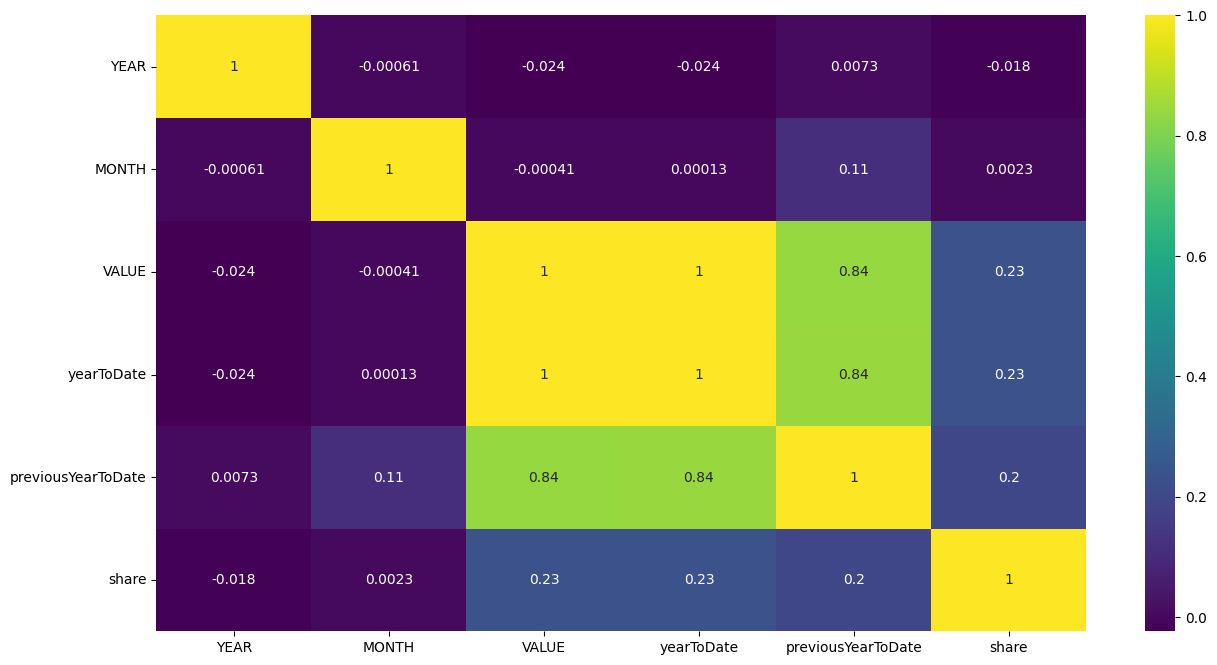

In [368]:

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='pearson')

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

In [369]:
#convert categorical data to numerical data

df['COUNTRY'] = df['COUNTRY'].astype('category')
df['PRODUCT'] = df['PRODUCT'].astype('category')
df['COUNTRY'] = df['COUNTRY'].cat.codes
df['PRODUCT'] = df['PRODUCT'].cat.codes
df.dtypes

COUNTRY                  int8
YEAR                    int64
MONTH                   int64
PRODUCT                  int8
VALUE                 float64
yearToDate            float64
previousYearToDate    float64
share                 float64
dtype: object

In [370]:
df['COUNTRY'].unique()

array([ 1,  2,  3,  6,  7, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24,
       25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 45,
       46, 47, 48, 49, 50, 51,  8,  0,  4,  5, 10, 11, 22, 30, 34, 43, 44,
        9], dtype=int8)

In [371]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [372]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Define features (X) and target variable (y)
features = ['COUNTRY', 'YEAR', 'MONTH', 'PRODUCT']
target = 'VALUE'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model


In [373]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [374]:
# Make y_predictions on the test set
y_pred = model.predict(X_test)



In [375]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

ValueError: continuous is not supported

In [ ]:

# Now you can use the trained model to make predictions for new data
# For example, if you have a new instance:
new_instance = pd.DataFrame({'COUNTRY': 27, 'YEAR': [2023], 'MONTH': [12], 'PRODUCT': 1})

# Make a prediction
prediction = model.predict(new_instance)
print(f'Predicted VALUE: {prediction[0]}')

Predicted VALUE: 70.3197128900001
